<a href="https://colab.research.google.com/github/Shrey-Viradiya/DiveDeep/blob/master/Prac5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 5

In [1]:
!nvidia-smi

Sun Feb 28 06:26:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Shrey Viradiya
### 18BCE259

In [2]:
import tensorflow as tf
import scipy as sp
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import sklearn.metrics

In [3]:
def plot_image(image):
    plt.imshow(image.squeeze(), cmap=plt.cm.binary, interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# train_images = train_images[:5000]
# train_labels = train_labels[:5000]

# test_images = test_images[:1000]
# test_labels = test_labels[:1000]

train_images = tf.image.resize(train_images, (74,74))

test_images = tf.image.resize(test_images, (74,74))

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

valid_images, valid_labels, test_images, test_labels = test_images[0:1000], test_labels[0:1000], test_images[1000:], test_labels[1000:]

In [5]:
type(train_images)

tensorflow.python.framework.ops.EagerTensor

In [6]:
len(train_labels)

50000

In [7]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
train_labels.shape

(50000, 10)

In [9]:
test_images.shape

TensorShape([9000, 74, 74, 3])

In [10]:
train_images = tf.keras.applications.resnet50.preprocess_input(train_images) 
test_images = tf.keras.applications.resnet50.preprocess_input(test_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

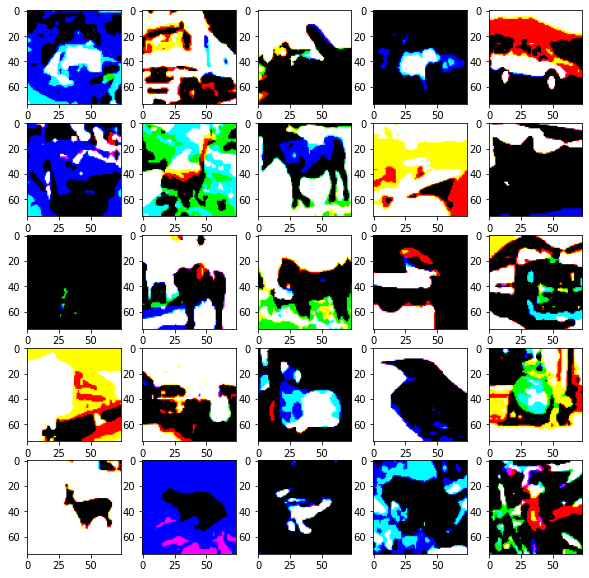

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(train_images[i])
plt.show()

In [12]:
m = tf.keras.applications.ResNet50(weights = 'imagenet', include_top=False, input_shape = (74,74,3) )

for l in m.layers:
    l.trainable = False

model = tf.keras.models.Sequential([
                                    m,
                                    tf.keras.layers.GlobalMaxPooling2D(),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
history = model.fit(train_images, train_labels, epochs=30, batch_size=50, validation_data=(valid_images, valid_labels), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)])

Epoch 1/30
1000/1000 [==============================] - 30s 26ms/step - loss: 2.1912 - accuracy: 0.6259 - val_loss: 2.6088 - val_accuracy: 0.4140
Epoch 2/30
1000/1000 [==============================] - 26s 26ms/step - loss: 1.1219 - accuracy: 0.7589 - val_loss: 2.4467 - val_accuracy: 0.4200
Epoch 3/30
1000/1000 [==============================] - 26s 26ms/step - loss: 1.0643 - accuracy: 0.7705 - val_loss: 3.3342 - val_accuracy: 0.3630
Epoch 4/30
1000/1000 [==============================] - 26s 26ms/step - loss: 1.0453 - accuracy: 0.7716 - val_loss: 2.7132 - val_accuracy: 0.4090
Epoch 5/30
1000/1000 [==============================] - 26s 26ms/step - loss: 1.0343 - accuracy: 0.7732 - val_loss: 3.4127 - val_accuracy: 0.3610
Epoch 6/30
1000/1000 [==============================] - 26s 26ms/step - loss: 1.0221 - accuracy: 0.7810 - val_loss: 3.3668 - val_accuracy: 0.3530
Epoch 7/30
1000/1000 [==============================] - 26s 26ms/step - loss: 1.0503 - accuracy: 0.7798 - val_loss: 2.8602 -

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

282/282 [==============================] - 7s 21ms/step - loss: 1.0002 - accuracy: 0.7953

Test accuracy: 0.7953333258628845


In [16]:
predictions = tf.squeeze(tf.argmax(model.predict(test_images), axis=-1))

In [17]:
predictions.shape

TensorShape([9000])

In [18]:
tf.squeeze(tf.argmax(test_labels, axis=-1))

<tf.Tensor: shape=(9000,), dtype=int64, numpy=array([5, 0, 8, ..., 5, 1, 7])>

In [19]:
print(sklearn.metrics.accuracy_score(predictions, tf.squeeze(tf.argmax(test_labels, axis=-1))))
print(sklearn.metrics.classification_report(predictions, tf.squeeze(tf.argmax(test_labels, axis=-1))))
print(sklearn.metrics.confusion_matrix(predictions, tf.squeeze(tf.argmax(test_labels, axis=-1))))

0.7953333333333333
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       871
           1       0.91      0.85      0.88       974
           2       0.76      0.79      0.77       862
           3       0.77      0.61      0.68      1124
           4       0.86      0.63      0.73      1234
           5       0.66      0.85      0.74       713
           6       0.82      0.89      0.85       814
           7       0.67      0.93      0.78       649
           8       0.88      0.85      0.86       921
           9       0.83      0.88      0.85       838

    accuracy                           0.80      9000
   macro avg       0.80      0.81      0.80      9000
weighted avg       0.80      0.80      0.79      9000

[[726   8  32  11   8   0   6  11  51  18]
 [ 18 827   1   9   4   1   4   2  26  82]
 [ 17   2 682  34  47  20  35  19   5   1]
 [ 11   5  52 687  29 215  60  46   8  11]
 [ 29   2  79  59 783  48  44 177   8   5]
 [  1  

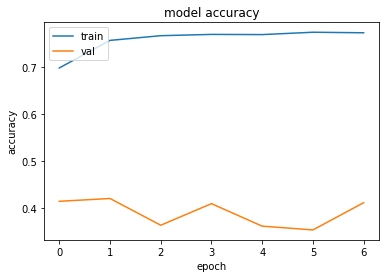

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()